In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

# Load dataset MNIST handwritten digit
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


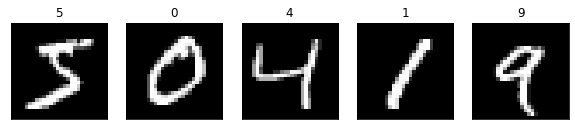

In [4]:
# Menampilkan beberapa gambar MNIST
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [6]:
# Convert y_train ke format one-hot
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train_one_hot = np.array(temp)
               
# Convert y_test ke format one-hot
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test_one_hot = np.array(temp)

In [7]:
print(y_train_one_hot[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
# Buat neural network sederhana
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [11]:
model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_test, y_test_one_hot))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8230 - acc: 0.7838 - val_loss: 0.4850 - val_acc: 0.8618
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4582 - acc: 0.8687 - val_loss: 0.4516 - val_acc: 0.8666
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4116 - acc: 0.8761 - val_loss: 0.3825 - val_acc: 0.8868
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3887 - acc: 0.8828 - val_loss: 0.3608 - val_acc: 0.8939
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3750 - acc: 0.8871 - val_loss: 0.3622 - val_acc: 0.8909
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3588 - acc: 0.8943 - val_loss: 0.3532 - val_acc: 0.8986
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3644 - acc: 0.8913 - val_loss: 0.3271 - val_acc: 0.9044
Epoch 8/10
1875/1875 [==============================] - 3s 1ms

In [12]:
predictions = model.predict(X_test)
print(predictions[0])

[9.1671274e-07 3.4899990e-06 9.2948096e-05 1.7802534e-03 1.5583804e-06
 7.9800902e-06 3.4836589e-09 9.9748814e-01 1.3184754e-05 6.1160658e-04]


In [13]:
predictions = np.argmax(predictions, axis=1)
print(predictions[0])

7


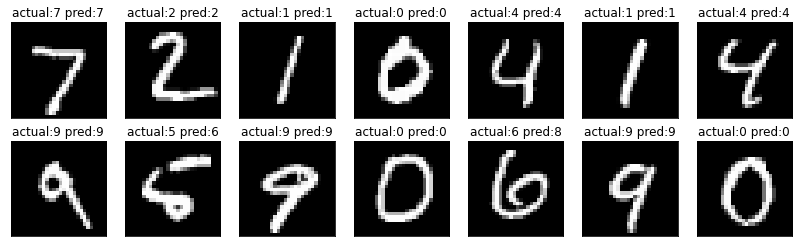

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=7, sharex=False,
                         sharey=True, figsize=(14, 4))
index = 0
for i in range(2):
    for j in range(7):
        axes[i,j].set_title('actual:{} pred:{}'.format(y_test[index], predictions[index]))
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()